In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 데이터 수집

In [2]:
summary = pd.read_csv('news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
summary.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [4]:
raw.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
summary['text'][:5] #뉴스 요약글

0    The Administration of Union Territory Daman an...
1    Malaika Arora slammed an Instagram user who tr...
2    The Indira Gandhi Institute of Medical Science...
3    Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4    Hotels in Maharashtra will train their staff t...
Name: text, dtype: object

In [6]:
summary['ctext'][:5] #뉴스 전체 기사

0    The Daman and Diu administration on Wednesday ...
1    From her special numbers to TV?appearances, Bo...
2    The Indira Gandhi Institute of Medical Science...
3    Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4    Hotels in Mumbai and other Indian cities are t...
Name: ctext, dtype: object

In [7]:
summary['headlines'][:5] #뉴스 헤드라인

0    Daman & Diu revokes mandatory Rakshabandhan in...
1    Malaika slams user who trolled her for 'divorc...
2    'Virgin' now corrected to 'Unmarried' in IGIMS...
3    Aaj aapne pakad liya: LeT man Dujana before be...
4    Hotel staff to get training to spot signs of s...
Name: headlines, dtype: object

In [8]:
print('전체 뉴스 개수 : ',len(summary),'전체 뉴스 추가 개수 : ',len(raw))

전체 뉴스 개수 :  4514 전체 뉴스 추가 개수 :  98401


In [9]:
summary.tail()

,author,date,headlines,read_more,text,ctext
4509,Mansha Mahajan,"24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...,http://indiatoday.intoday.in/story/rasna-eyes-...,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m..."
4510,Dishant Sharma,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...,http://indiatoday.intoday.in/story/sachin-tend...,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...
4511,Tanya Dhingra,"03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...,http://www.hindustantimes.com/bollywood/secret...,"Aamir Khan, while talking about reality shows ...","Aamir Khan, whose last film Dangal told the st..."
4512,Pragya Swastik,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused...",http://indiatoday.intoday.in/story/singer-asha...,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...
4513,Chhavi Tyagi,"03 Aug 2017,Thursday",More than half of India's languages may die in...,http://indiatoday.intoday.in/story/indian-lang...,At least 400 languages or more than half langu...,More than half of the languages spoken by Indi...


In [10]:
news=summary[['headlines','text']] #헤드라인과 요약문만 갖고 옴
news.head()

,headlines,text
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...


In [11]:
summary['headlines'][0]

'Daman & Diu revokes mandatory Rakshabandhan in offices order'

In [12]:
summary['text'][0]

'The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.'

In [13]:
summary['ctext'][0]

'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [14]:
len(news) #뉴스 기사 전체 개수

4514

In [15]:
df1=pd.concat([news,raw]) #두 데이터 합치기
df1

,headlines,text
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


In [16]:
df1.sample(10)

,headlines,text
21931,Cheeto shaped like running man wins Canadian w...,A Cheeto shaped like a man running with an Ame...
84507,New hostel built in Ukraine's Chernobyl exclus...,"A new hostel in Chernobyl, Ukraine, offers sho..."
81523,Tesla's newest car Model 3 revealed for the fi...,Electric carmaker Tesla's Co-founder Elon Musk...
37201,Gujarat gives Indian citizenship to 90 Hindus ...,Ahmedabad district authority on Friday awarded...
3001,Defence Ministry scraps ?6500 crore Navy chopp...,"The Defence Ministry has scrapped a ?6,500-cro..."
92715,Babri demolition more serious than Gandhi's ki...,AIMIM chief Asaduddin Owaisi has slammed the g...
56775,"Tokyo airport's robots to give directions, hel...","The terminals of Tokyo airport will be ""scatte..."
87927,"2 minors gang raped by 8 men, offered Ã¢ÂÂ¹50...",Two minor girls were gang raped by eight men i...
8790,"Pune man cheated through Instagram message, lo...",A 37-year-old Pune man lost Ã¢ÂÂ¹33.5 lakh af...
15537,"Musk backed out of SEC deal, refused to step d...",Tesla CEO Elon Musk reportedly backed out of a...


## 데이터 전처리

In [17]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', df1['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', df1['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 100227
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 99916


In [18]:
df1.drop_duplicates(subset=['text'], inplace=True)
print("전체 샘플수 :", len(df1))

전체 샘플수 : 100227


In [19]:
print(df1.isnull().sum())

headlines    0
text         0
dtype: int64


In [20]:
# 전처리 함수 내 사용
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [21]:
stop_words=set(stopwords.words('english'))
print('불용어 개수 : ',len(stop_words))
print(stop_words)

불용어 개수 :  179
{'this', 'its', 'what', 'because', "you're", 'very', 'won', 'your', 'shouldn', 'a', 're', "you'll", 'up', 'too', "hadn't", 'of', 'should', "you've", 'while', "couldn't", 'aren', 'mustn', 'theirs', 'down', 'doing', 'out', 'no', 'after', 'ourselves', 'most', 'but', 'by', 'from', 'both', 'y', 'so', 'an', 'can', 'ain', 'where', 'for', 'through', 'yourselves', 've', 'weren', 'more', 'whom', 'not', "weren't", "won't", 'o', 'we', 'with', 'myself', 'having', 'm', 'our', 'about', 'yourself', 'are', 'do', 'off', 'be', 'same', 'there', 'these', 'between', 'during', 'and', 'doesn', 'his', 'was', 'had', 'or', 'now', 'only', 'you', 'which', "shouldn't", 'them', 'then', 'such', "mustn't", 'i', 'she', 'why', 'here', 'just', 'who', 'were', "it's", 'wouldn', 'shan', "don't", 'been', 'the', 'to', 'ma', "aren't", 'ours', 'couldn', 'hadn', 'on', 'hasn', "isn't", "should've", "haven't", 'me', "you'd", 'her', 'once', "doesn't", 'they', "she's", 'few', 'other', 't', 'don', "didn't", 'isn', 'thos

In [22]:
def preprocess_sentence(sentence,remove_stopwords=True):
    sentence=sentence.lower()
#     sentence=BeautifulSoup(sentence,'lxml')
#     sentence=re.sub(r'\([^)]*\)','',sentence)
#     sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence=' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ") ])
    sentence=re.sub(r"'s\b","",sentence) #소유격 제거
    sentence = re.sub("[^a-zA-Z]", " ", sentence) #특수기호 제거
    sentence=re.sub('[m]{2,}','mm',sentence) #m이 2개 이상일 경우 mm으로 대체
    if remove_stopwords:#text에만 불용어제거
        tokens=' '.join(word for word in sentence.split() if not word in stop_words
                       if len(word)>1) #한 단어일 경우 제거
    else:#headlines에는 불용어 미제거
        tokens=' '.join(word for word in sentence.split() if len(word)>1)
    return tokens

In [23]:
clean_text=[] #text 열 전처리
for s in df1['text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['administration union territory daman diu revoked order made compulsory women tie rakhis male colleagues occasion rakshabandhan august administration forced withdraw decision within hours issuing circular received flak employees slammed social media',
 'malaika arora slammed instagram user trolled divorcing rich man fun alimony life wearing short clothes going gym salon enjoying vacation user commented malaika responded certainly got get damn facts right spewing sh know nothing',
 'indira gandhi institute medical sciences igims patna thursday made corrections marital declaration form changing virgin option unmarried earlier bihar health minister defined virgin unmarried woman consider term objectionable institute however faced strong backlash asking new recruits declare virginity form',
 'lashkar taiba kashmir commander abu dujana killed security forces said kabhi hum aage kabhi aap aaj aapne pakad liya mubarak ho aapko today caught congratulations caught added surrender whatever fate

In [24]:
df1['text'][:5]

0    The Administration of Union Territory Daman an...
1    Malaika Arora slammed an Instagram user who tr...
2    The Indira Gandhi Institute of Medical Science...
3    Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4    Hotels in Maharashtra will train their staff t...
Name: text, dtype: object

In [25]:
clean_summary = [] #headline 열 전처리
for s in df1['headlines']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]

['daman diu revokes mandatory rakshabandhan in offices order',
 'malaika slams user who trolled her for divorcing rich man',
 'virgin now corrected to unmarried in igims form',
 'aaj aapne pakad liya let man dujana before being killed',
 'hotel staff to get training to spot signs of sex trafficking']

In [26]:
df1['headlines'][:5]

0    Daman & Diu revokes mandatory Rakshabandhan in...
1    Malaika slams user who trolled her for 'divorc...
2    'Virgin' now corrected to 'Unmarried' in IGIMS...
3    Aaj aapne pakad liya: LeT man Dujana before be...
4    Hotel staff to get training to spot signs of s...
Name: headlines, dtype: object

In [27]:
#전처리 한 열들 정리
df1['text']=clean_text
df1['headlines']=clean_summary

In [28]:
#길이가 공백인 샘플은 null로 변환
df1.replace('', np.nan, inplace=True)
print(df1.isnull().sum())

headlines    0
text         0
dtype: int64


In [29]:
print('전체 샘플수 :',(len(df1)))

전체 샘플수 : 100227


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.2701667215421
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.293503746495455


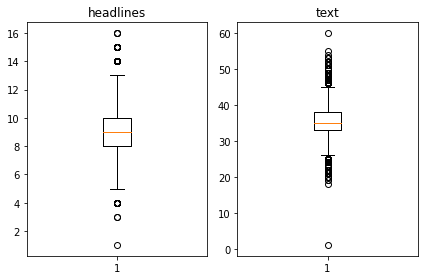

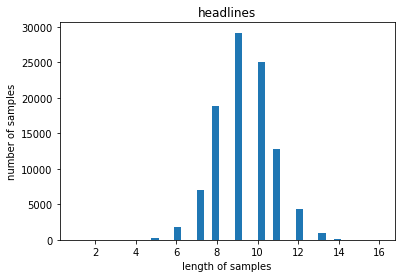

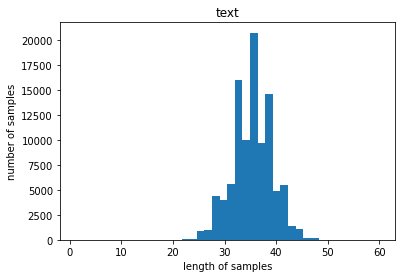

In [30]:
#텍스트,요약 분포도
text_len=[len(s.split()) for s in df1['text']]
headlines_len=[len(s.split()) for s in df1['headlines']]
print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

원문은 대체적으로 50 이하의 길이를 가지는 편인데 비해 요약은 8~10 사이에 분포되어있습니다

In [31]:
text_max_len=35
headlines_max_len=10

In [32]:
def below_threshold_len(max_len,nested_list):
    cnt=0
    for s in nested_list:
        if(len(s.split())<=max_len):
            cnt=cnt+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [33]:
below_threshold_len(text_max_len, df1['text'])

전체 샘플 중 길이가 35 이하인 샘플의 비율: 0.5231624213036408


In [34]:
below_threshold_len(headlines_max_len, df1['headlines'])

전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8175341973719656


In [35]:
df1 = df1[df1['text'].apply(lambda x: len(x.split()) <= text_max_len)]
df1 = df1[df1['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :',(len(df1)))

전체 샘플수 : 42215


In [36]:
len(df1)

42215

In [37]:
df1.head()

,headlines,text
0,daman diu revokes mandatory rakshabandhan in o...,administration union territory daman diu revok...
1,malaika slams user who trolled her for divorci...,malaika arora slammed instagram user trolled d...
6,delhi hc reduces aid for negligent accident vi...,delhi high court reduced compensation awarded ...
7,yr old lynched over rumours she was cutting pe...,year old dalit woman allegedly lynched agra vi...
8,chopper flying critically low led to bombay hi...,inquiry aircraft accident investigation bureau...


In [38]:
df1['headlines']=df1['headlines'].apply(lambda x : 'sostoken '+ x + ' eostoken')
df1.head()
#headlines 앞 뒤에 sostoken,eostoken 추가

,headlines,text
0,sostoken daman diu revokes mandatory rakshaban...,administration union territory daman diu revok...
1,sostoken malaika slams user who trolled her fo...,malaika arora slammed instagram user trolled d...
6,sostoken delhi hc reduces aid for negligent ac...,delhi high court reduced compensation awarded ...
7,sostoken yr old lynched over rumours she was c...,year old dalit woman allegedly lynched agra vi...
8,sostoken chopper flying critically low led to ...,inquiry aircraft accident investigation bureau...


In [39]:
text_data=list(df1['text']) 
summary_data=list(df1['headlines'])
#기사데이터,요약데이터(헤드라인) 저장

In [40]:
#데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_data, summary_data, test_size=0.2, random_state=0, shuffle=True)
print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(x_test))
print('테스트 레이블의 개수 :',len(y_test))

훈련 데이터의 개수 : 33772
훈련 레이블의 개수 : 33772
테스트 데이터의 개수 : 8443
테스트 레이블의 개수 : 8443


In [41]:
#원문 토큰화
src_tokenizer=Tokenizer()
src_tokenizer.fit_on_texts(x_train)

In [42]:
threshold=7
total_cnt=len(src_tokenizer.word_index) #단어의 수
rare_cnt=0 #threshold보다 작은 단어 등장 수
total_freq=0 #전체 단어 빈도수 총합
rare_freq=0 #threshold보다 작은 단어 등장 수 총합

for key,value in src_tokenizer.word_counts.items():
    total_freq=total_freq+value
    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value<threshold):
        rare_cnt=rare_cnt+1
        rare_freq=rare_freq+value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45596
등장 빈도가 6번 이하인 희귀 단어의 수: 31945
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13651
단어 집합에서 희귀 단어의 비율: 70.06097026054917
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.008014582595132


In [43]:
src_vocab = 10000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(x_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
x_train = src_tokenizer.texts_to_sequences(x_train) 
x_test = src_tokenizer.texts_to_sequences(x_test)

In [44]:
print(x_train[:5])

[[901, 87, 1228, 803, 4386, 2622, 5067, 8608, 6528, 796, 1151, 8608, 2223, 3222, 1262, 704, 1367, 3960, 1538, 8608, 4387, 8608, 6528, 1, 531], [173, 17, 1105, 622, 3, 13, 61, 4835, 6529, 22, 232, 6164, 1506, 333, 216, 38, 9910, 2053, 3042, 2505, 17, 38, 2272, 6164, 522, 383, 4835, 10, 1644, 415, 7, 581, 1080], [272, 1255, 1446, 709, 15, 59, 2678, 1, 288, 973, 59, 3888, 4570, 16, 709, 2735, 408, 372, 316, 1235, 1045, 304, 4, 1753, 1255, 2678, 2, 1255, 4, 1487], [26, 8, 9001, 3355, 1299, 682, 134, 63, 1, 70, 85, 1691, 1990, 587, 282, 1299, 797, 26, 40, 134, 92, 1820, 15, 2875, 266, 2709, 1513, 5569, 1299], [9, 2710, 2273, 478, 1, 209, 4954, 2273, 155, 893, 21, 35, 24, 1777, 399, 893, 21, 276, 14, 1470, 1778, 780, 305, 138, 103, 7938, 767]]


In [45]:
#헤드라인 데이터 토큰화
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(y_train)

In [46]:
threshold=6
total_cnt=len(tar_tokenizer.word_index)
rare_cnt=0
total_freq=0
rare_freq=0
for key,value in tar_tokenizer.word_counts.items():
    total_freq=total_freq+value
    if(value<threshold):
        rare_cnt=rare_cnt+1
        rare_freq=rare_freq+value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 21239
등장 빈도가 5번 이하인 희귀 단어의 수: 14834
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 6405
단어 집합에서 희귀 단어의 비율: 69.84321295729555
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.723496050842496


In [47]:
tar_vocab=6500
tar_tokenizer=Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(y_train)
#텍스트를 정수 시퀀스로 변환
y_train = tar_tokenizer.texts_to_sequences(y_train) 
y_test = tar_tokenizer.texts_to_sequences(y_test) 

In [48]:
print(y_train[:5])
type(y_train)

[[1, 851, 2528, 97, 1208, 5724, 19, 4106, 2], [1, 70, 1998, 96, 29, 72, 34, 3376, 5, 4737, 17, 2], [1, 1999, 6, 6406, 5, 163, 111, 6407, 1870, 2], [1, 24, 23, 227, 4, 387, 6, 442, 1001, 2], [1, 2337, 985, 258, 3844, 4, 334, 1481, 2]]


list

In [49]:
#빈 샘플 제거
drop_train = [index for index, sentence in enumerate(y_train) if len(sentence) == 2]
drop_test = [index for index, sentence in enumerate(y_test) if len(sentence) == 2]

In [50]:
print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(x_test))
print('테스트 레이블의 개수 :',len(y_test))

훈련 데이터의 개수 : 33772
훈련 레이블의 개수 : 33772
테스트 데이터의 개수 : 8443
테스트 레이블의 개수 : 8443


In [51]:
x_train=np.delete(x_train,drop_train,axis=0)
x_test=np.delete(x_test,drop_test,axis=0)
y_train=np.delete(y_train,drop_train,axis=0)
y_test=np.delete(y_test,drop_test,axis=0)

print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(x_test))
print('테스트 레이블의 개수 :',len(y_test))
x_test.shape

훈련 데이터의 개수 : 33772
훈련 레이블의 개수 : 33772
테스트 데이터의 개수 : 8442
테스트 레이블의 개수 : 8442


(8442,)

In [52]:
#패딩 작업
x_train=pad_sequences(x_train,maxlen=text_max_len,padding='post')
x_test=pad_sequences(x_test,maxlen=text_max_len,padding='post')
y_train=pad_sequences(y_train,maxlen=headlines_max_len,padding='post')
y_test=pad_sequences(y_test,maxlen=headlines_max_len,padding='post')

## 모델 설계 및 훈련

In [53]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [76]:
embedding_dim=128
hidden_size=128
encoder_inputs=Input(shape=(text_max_len,)) #인코더
enc_emb=Embedding(src_vocab,embedding_dim)(encoder_inputs)#임베딩층

encoder_lstm1=LSTM(hidden_size,return_sequences=True,return_state=True,
                  dropout=0.4,recurrent_dropout=0.4) #lstm1
encoder_output1,state_h1,state_c1=encoder_lstm1(enc_emb)
encoder_lstm2=LSTM(hidden_size,return_sequences=True,return_state=True,
                  dropout=0.4,recurrent_dropout=0.4) #lstm2
encoder_output2,state_h2,state_c2=encoder_lstm2(encoder_output1)
encoder_lstm3=LSTM(hidden_size,return_sequences=True,return_state=True,
                  dropout=0.4,recurrent_dropout=0.4) #lstm3
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [77]:
#디코더
decoder_inputs = Input(shape=(None,))

dec_emb_layer = Embedding(tar_vocab, embedding_dim)#임베딩층
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, 
                    dropout = 0.4, recurrent_dropout=0.2)#lstm
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [78]:
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')#출력층
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 128)      1280000     input_6[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 35, 128), (N 131584      embedding_2[0][0]                
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [79]:
#어텐션 메커니즘 사용
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [80]:
attn_layer=AttentionLayer(name='attention_layer')#어텐션 층
attn_out,attn_states=attn_layer([encoder_outputs,decoder_outputs])
# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input=Concatenate(axis=-1,name='concat_layer')([decoder_outputs, attn_out])
#디코더의 출력층
decoder_softmax_layer=Dense(tar_vocab,activation='softmax')
decoder_softmax_outputs=decoder_softmax_layer(decoder_concat_input)
#최종 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 128)      1280000     input_6[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 35, 128), (N 131584      embedding_2[0][0]                
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________

In [81]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [82]:
y_train[:,:-1][:5]

array([[   1,  851, 2528,   97, 1208, 5724,   19, 4106,    2],
       [1998,   96,   29,   72,   34, 3376,    5, 4737,   17],
       [   1, 1999,    6, 6406,    5,  163,  111, 6407, 1870],
       [   1,   24,   23,  227,    4,  387,    6,  442, 1001],
       [   1, 2337,  985,  258, 3844,    4,  334, 1481,    2]])

In [83]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)
history=model.fit([x_train,y_train[:,:-1]],y_train.reshape(y_train.shape[0],y_train.shape[1],1)[:,1:]\
                  ,epochs=10,callbacks=[es],batch_size=256,validation_data=([x_test,y_test[:,:-1]],\
                                y_test.reshape(y_test.shape[0],y_test.shape[1],1)[:,1:]))

Epoch 1/10
132/132 [==============================] - 448s 3s/step - loss: 6.5257 - val_loss: 6.1653
Epoch 2/10
132/132 [==============================] - 411s 3s/step - loss: 6.0886 - val_loss: 5.9142
Epoch 3/10
132/132 [==============================] - 303s 2s/step - loss: 5.8555 - val_loss: 5.7032
Epoch 4/10
132/132 [==============================] - 307s 2s/step - loss: 5.7042 - val_loss: 5.5777
Epoch 5/10
132/132 [==============================] - 311s 2s/step - loss: 5.5468 - val_loss: 5.4563
Epoch 6/10
132/132 [==============================] - 317s 2s/step - loss: 5.3957 - val_loss: 5.4596
Epoch 7/10
132/132 [==============================] - 322s 2s/step - loss: 5.2596 - val_loss: 5.2405
Epoch 8/10
132/132 [==============================] - 322s 2s/step - loss: 5.1317 - val_loss: 5.1552
Epoch 9/10
132/132 [==============================] - 321s 2s/step - loss: 5.0099 - val_loss: 5.0802
Epoch 10/10
132/132 [==============================] - 330s 2s/step - loss: 4.8981 - val_lo

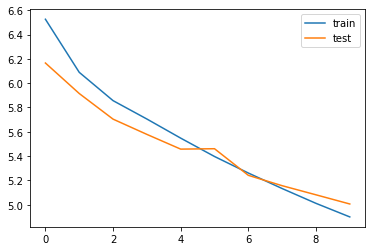

In [85]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

지속적으로 줄어들지만 loss값이 큰 편이다.

## 요약모델 테스트

In [86]:
src_index_to_word=src_tokenizer.index_word #요약문에서 단어를 얻음
tar_word_to_index=tar_tokenizer.word_index #헤드라인에서 정수를 얻음
tar_index_to_word=tar_tokenizer.index_word #헤드라인에서 단어를 얻음

### 새로운 seq2seq 설계

In [87]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [88]:
#이전 시점의 상태들을 저장
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
#초기 상태(initial_state)를 이전 시점의 상태로 사용(다음 단어를 예측하기 위함)
#LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [89]:
#어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])
#디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 
#최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [90]:
def decode_sequence(input_seq):
    #인코더의 상태를 얻음
    e_out,e_h,e_c=encoder_model.predict(input_seq)
    # <SOS>에 해당하는 토큰 생성
    target_seq=np.zeros((1,1))
    target_seq[0,0]=tar_word_to_index['sostoken']
    stop_condition=False
    decoded_sentence=''
    while not stop_condition:
        output_tokens,h,c=decoder_model.predict([target_seq]+[e_out,e_h,e_c])
        sampled_token_index=np.argmax(output_tokens[0,-1,:])
        sampled_token=tar_index_to_word[sampled_token_index]
        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token
        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token=='eostoken' or len(decoded_sentence.split())>=(headlines_max_len-1)):
            stop_condition=True
            
        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq=np.zeros((1,1))
        target_seq[0,0]=sampled_token_index
        #업데이트
        e_h,e_c=h,c
    return decoded_sentence

In [91]:
def seq2text(input_seq):#원문의 정수를 텍스트로 변환
    temp=''
    for i in input_seq:
        if(i!=0):
            temp=temp+src_index_to_word[i]+' '
    return temp

def seq2summary(input_seq):#헤드라인을 텍스트로 변환
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp=temp+tar_index_to_word[i]+' '
    return temp

In [93]:
for i in range(0, 500):
    print("원문 : ",seq2text(x_test[i]))
    print("실제 헤드라인 :",seq2summary(y_test[i]))
    print("예측 헤드라인 :",decode_sequence(x_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  paris saint thrashed defending champions monaco win france title sunday five games spare season psg fifth title six years seventh overall meanwhile psg world record signing neymar jr attendance recovering surgery 
실제 헤드라인 : thrash defending champs to win th title 
예측 헤드라인 :  world cup wins record in


원문 :  new poster akshay kumar starrer gold unveiled eve th birthday friday every cloud silver love clouds got gold age poster film close heart tweeted gold release august next year 
실제 헤드라인 : poster of gold unveiled on akshay kumar day eve 
예측 헤드라인 :  salman khan to star in film reports


원문 :  lakh people around third civilians killed syrian conflict since started six years ago according syrian observatory human rights monitor said deaths people since march conflict displaced half syria population 
실제 헤드라인 : over lakh people killed in syria war monitor 
예측 헤드라인 :  mumbai killed in mumbai floods


원문 :  prithvi shaw led india world cup victory february year set make team india debut

예측 헤드라인 :  bjp yadav to be against bjp


원문 :  motion poster upcoming manoj bajpayee starrer rukh released film also stars described story family loss rukh marks directorial debut mukherjee feature films scheduled release october 
실제 헤드라인 : motion poster of manoj bajpayee rukh released 
예측 헤드라인 :  trailer of song starrer released


원문 :  temple gujarat selling pen set claims help students pass exams said offer full refund student fails even using pen set costs issued temple said made using acquired performing hanuman 
실제 헤드라인 : sells pens to students full refund if student fails 
예측 헤드라인 :  delhi govt to get students for


원문 :  indian batsman gautam gambhir turned sunday top scorer india world cup finals india gambhir smashed ball pakistan final inaugural world india five runs world cup gambhir scored sri lanka 
실제 헤드라인 : gambhir top scored in india and world cup finals 
예측 헤드라인 :  india to play in india


원문 :  senior journalist gauri lankesh shot dead house bengaluru nagar tuesday g

예측 헤드라인 :  man found in us airport in


원문 :  responding reports government websites displayed aadhaar data uidai monday asserted data leaked server calling reports representation facts authority clarified data placed public domain disclosure rti act collected third party users various welfare schemes 
실제 헤드라인 : aadhaar data never leaked from our uidai 
예측 헤드라인 :  govt to launch aadhaar for


원문 :  big air world championship held ski world championships usa big air competition involves riders performing air norway men category austria anna took women gold 
실제 헤드라인 : in pictures big air world championship 
예측 헤드라인 :  world cup to be for world cup


원문 :  business software major co founder ceo friday took twitter invite microsoft employees laid apply job company also included email address potential applicants last week microsoft announced would cut jobs sales marketing departments 
실제 헤드라인 : ceo tries to hire off microsoft employees 
예측 헤드라인 :  apple ceo ceo to launch


원문 :  chief mini

예측 헤드라인 :  apple ceo raises billion in


원문 :  lawyer businessman accused raping veteran bollywood actress denied charges man claiming two married client actress husband wife question section rape said denied charges cheating said case family dispute 
실제 헤드라인 : actress married to businessman she accused of rape lawyer 
예측 헤드라인 :  woman accused of sexual harassment


원문 :  prime minister narendra modi reportedly reprimanded ministers star hotel government accommodation also asked avoid taking benefits public sector attached ministries reportedly also said taking vehicles personal use tolerated 
실제 헤드라인 : modi warns ministers over star stays 
예측 헤드라인 :  pm modi to be for pm modi


원문 :  punjab minister navjot singh sidhu reacting early trends assembly election results tuesday said results created bjp power decision making democracy hands people people voice triggered panic bjp added said congress party 
실제 헤드라인 : election results have created in bjp sidhu 
예측 헤드라인 :  bjp cm should be bjp

예측 헤드라인 :  amazon to invest crore in


원문 :  president poland supreme court urged country judges fight every inch justice ruling party plans way judges appointed government proposals terms judges terminated within days draft law would selected polish parliament 
실제 헤드라인 : judges to fight every inch for independence 
예측 헤드라인 :  sc rejects to be for


원문 :  govinda whose upcoming film raja given cuts censor board alleged group people film industry conspiring letting films release good platform one supporting producers backing said govinda added films targeted last nine years 
실제 헤드라인 : one supporting me today people conspiring against me govinda 
예측 헤드라인 :  kangana of film in film


원문 :  following incident wherein passenger dragged united flight ceo oscar munoz said man treatment experience airline accepted full responsibility prove moment company determined ever put customers centre everything added 
실제 헤드라인 : incident of man being dragged off plane united ceo 
예측 헤드라인 :  woman to be l

예측 헤드라인 :  video of fan to be


원문 :  information broadcasting ministry tuesday increased rates government releases advertisements print media decision great benefit especially medium small newspapers including large number papers regional languages ministry said rates last revised 
실제 헤드라인 : ministry raises govt ad rates in print media by 
예측 헤드라인 :  govt to launch in india


원문 :  centre introducing mark sheets gram performance attempt poverty rural areas score low marks receiving resources rural development ministry said covering development parameters mark sheet include marks infrastructure economic activities human resources 
실제 헤드라인 : centre to introduce mark sheets for 
예측 헤드라인 :  india to be in india


원문 :  filmmaker karan johar launched first radio show calling karan station sharing news twitter karan described show one stop advice shop relationships matters heart two hour show air thrice day five days week 
실제 헤드라인 : karan johar launches his first radio show calling karan 
예

예측 헤드라인 :  trump to trump trump trump


원문 :  centre monday told supreme court abandoned operation rescue miners trapped inside illegal coal mine meghalaya constantly use extract water mine meghalaya government said status report government made every possible effort meghalaya government added 
실제 헤드라인 : rescue of trapped miners not abandoned centre to sc 
예측 헤드라인 :  cbi to be for protest


원문 :  bjp morcha organise kabaddi tournaments karnataka part celebrations party tournaments see participation teams assembly constituency hope event help huge turn kabaddi matches bjp ideology policies said organiser 
실제 헤드라인 : bjp to karnataka voters with kabaddi 
예측 헤드라인 :  bjp cm calls to be in


원문 :  least mobile theft cases registered across mumbai government railway police daily officials said average cases registered police station every day added stating cctvs railway stations cover tracks officials said majority crimes committed youngsters aged 
실제 헤드라인 : mobile theft cases reported in mum

예측 헤드라인 :  india to be in india


원문 :  mumbai police friday used reference recent australian cricket team ball tampering scandal exposed cameras one tweets urging people follow rules set cctv cameras fielding streets mumbai follow rules get caught behind lens wrote 
실제 헤드라인 : police uses ball tampering row meme to spread awareness 
예측 헤드라인 :  trump to be for for


원문 :  fast food chain mcdonald announced adding eggs breakfast menu indian breakfast menu launched friday outlets across mumbai priced mcdonald added new gradually introduced across indian cities 
실제 헤드라인 : mcdonald announces 
예측 헤드라인 :  scientists the world first world world


원문 :  bombay high court granted compensation lakh year old murder convict illegally detained jail three years nine months beyond sentence bench directed government pay within days failing would shell interest rate year 
실제 헤드라인 : convict gets lakh compensation for yrs jail beyond term 
예측 헤드라인 :  delhi court bans students for students


원문 :  us air f

예측 헤드라인 :  flipkart to pay for crore


원문 :  cab hailing startup uber pledged million course five years prevent sexual assault domestic violence initial portion funding go groups like call men startup said move comes multiple cases sexual harassment uber assault drivers came light 
실제 헤드라인 : uber pledges million to prevent sexual assault 
예측 헤드라인 :  google to be that to be


원문 :  chicago mayor declared city trump free zone president donald trump scrapped program aimed protecting immigrants home nothing worry said program aimed protecting lakh immigrants illegally brought us children deported 
실제 헤드라인 : mayor declares chicago trump free zone 
예측 헤드라인 :  trump trump trump trump trump trump


원문 :  asaram bapu cook doctor killed self styled godman rape case lodged son narayan two gujarat based sisters another man killed testimony asaram rape case lodged minor rajasthan asaram given life term wednesday 
실제 헤드라인 : witnesses in rape cases against asaram were killed 
예측 헤드라인 :  rape accused 

예측 헤드라인 :  kohli is not be on kohli


원문 :  bjp leader piyush goyal thursday called congress president rahul gandhi media address bengaluru adding many people allowed ask questions address questions goyal said congress president along failed corrupt siddaramaiah government answers issues karnataka 
실제 헤드라인 : rahul gandhi bengaluru media address bjp 
예측 헤드라인 :  rahul gandhi rahul gandhi to rahul


원문 :  facebook designated group rohingya muslims dangerous organisation ordered delete content praising comes amid violence myanmar security forces community un called example ethnic activists accused facebook muslim minority myanmar military 
실제 헤드라인 : facebook bans rohingya group posts amid ethnic 
예측 헤드라인 :  prez bans not not for


원문 :  many mysterious reported across locations us uk australia suggested come jets nasa scientist us survey noted result earthquake us air force yet confirm sounds produced military 
실제 헤드라인 : reported times worldwide in 
예측 헤드라인 :  world largest largest world l

예측 헤드라인 :  india to be for pakistan


원문 :  indians arrested suspected links terrorist group isis across states national investigation agency nia agencies uttar pradesh recorded maximum number arrests followed maharashtra telangana kerala karnataka eight states accounted arrests well 
실제 헤드라인 : indians arrested for suspected isis links up on top 
예측 헤드라인 :  us arrests in us


원문 :  several scientists working russia top secret nuclear facility arrested using private purposes including bitcoin mining supposed connected internet order prevent however scientists attempted facility authorities alerted launched criminal case 
실제 헤드라인 : russians arrested for mining bitcoin at nuclear facility 
예측 헤드라인 :  us to be with us


원문 :  least people killed km mumbai pune expressway past four months deaths resulted due vehicles rammed vehicles low visibility high speed many accidents involving vehicles expressway reported january february year 
실제 헤드라인 : killed on mumbai pune expressway in months 
예측 

예측 헤드라인 :  uk court apologises for over


원문 :  central pollution control board asked delhi police ensure supreme court order burning crackers followed new year eve according order green crackers used time two hours order violated diwali year burning toxic firecrackers 
실제 헤드라인 : ensure ban in delhi 
예측 헤드라인 :  delhi court bans students for


원문 :  facebook admitted data billion users vulnerable users public could malicious entities feature allowed users enter person phone number email address facebook search help find abused facebook said added feature disabled 
실제 헤드라인 : data on most of billion users was facebook 
예측 헤드라인 :  google to launch users users for iphone


원문 :  actress katrina kaif said never back plan believes plan like accepting failure added need balanced attitude life failures biggest teachers said educated enough bollywood might write book 
실제 헤드라인 : having plan is like accepting failure katrina kaif 
예측 헤드라인 :  am not my my my alia alia


원문 :  responding petitions s

예측 헤드라인 :  rape accused of rape case in bihar


원문 :  man arrested monday afternoon tried take across us airport said police man told police dropped airport fill job application claimed jumped fence realising wrong location airport 
실제 헤드라인 : man arrested after trying to use airport as 
예측 헤드라인 :  man arrested for stealing in delhi


원문 :  veteran actress rekha performed international indian film academy iifa awards bangkok years last performance award ceremony could honoured tweeted official page iifa sharing video performance songs like meri jaan ki 
실제 헤드라인 : performs at iifa award ceremony after years 
예측 헤드라인 :  to be in the film


원문 :  jeweller nirav modi claimed female employee firm illegally arrested cbi employee lawyer claimed arrested pm woman cannot arrested per law nirav said concerned safety citing process way employee arrested 
실제 헤드라인 : woman employee of my firm arrested illegally nirav modi 
예측 헤드라인 :  pm modi to be in


원문 :  police sunday said year old woman allegedl

예측 헤드라인 :  man arrested for being for his


원문 :  year old man died monday clothes allegedly caught fire smoking inside house delhi man reportedly smoking ground floor wife first floor incident happened police said exact cause death confirmed autopsy report 
실제 헤드라인 : delhi man dies after clothes catch fire while smoking 
예측 헤드라인 :  year old girl gangraped in delhi


원문 :  pm narendra modi crore followers facebook came power number past crore marking three fold increase government completed three years lakh people started following pm modi past six months announcement demonetisation november 
실제 헤드라인 : modi facebook followers increase in yrs of govt 
예측 헤드라인 :  pm modi to be for pm modi


원문 :  mob attacked woman near slaughter house saturday reported police cattle illegally transported slaughter bengaluru woman said reached slaughter house police falsely told policemen present woman added approach senior officials regarding police officials information 
실제 헤드라인 : woman attacked for re

예측 헤드라인 :  woman arrested for raping minor girl in delhi


원문 :  kangana ranaut veiled reference hrithik roshan said superstar trying put behind bars added threats got professional environment acid attack sister faced common society kangana said talking threats deepika padukone padmavati wrong surprising 
실제 헤드라인 : is trying to put me behind bars kangana ranaut 
예측 헤드라인 :  kangana khan to be with


원문 :  lok sabha friday passed indian institute management iim bill aims giving schools autonomy allow grant degrees iim bill declaration existing institutions national importance difficult run new delhi hrd minister prakash javadekar said 
실제 헤드라인 : lok sabha passes bill to give more autonomy to 
예측 헤드라인 :  govt to be for aadhaar


원문 :  russian defence ministry wednesday said tonnes chemical weapons abandoned militants found syria ministry said chemical weapon production facilities also discovered areas militants last year chemical attack syria killed least people injured around others 
실제 

예측 헤드라인 :  trailer of trailer of released


원문 :  real madrid superstar cristiano ronaldo revealed reason behind new stating promised get haircut scored champions league final real madrid real madrid champions league second season row beating juventus saturday night 
실제 헤드라인 : ronaldo new if real won title 
예측 헤드라인 :  to play in the cricket


원문 :  securities firm ventures stock gained year becoming world best performing stock among companies market value least billion company profit june quarter doubled crore million year ago ventures market value crore 
실제 헤드라인 : world top stock with nearly gain 
예측 헤드라인 :  india to invest crore in india


원문 :  indian coach anil kumble thursday said important move ahead defeat pune focus bengaluru test get back winning ways australia quality side sides quality sides looking forward game start winning note added 
실제 헤드라인 : forward to get back to winning ways anil kumble 
예측 헤드라인 :  bcci is the india to be


원문 :  congress vice president rahul gandhi 

예측 헤드라인 :  man who to death after his


원문 :  rajinikanth promised sponsor higher education class boy returned police wallet containing notes found road leading school adding today age people cheat kill even little money rajinikanth praised saying honesty great quality 
실제 헤드라인 : rajinikanth to education of boy who returned 
예측 헤드라인 :  man to death in delhi


원문 :  two men chennai arrested selfie posted one marijuana plant terrace went viral one accused posted photo facebook despite warned friend police officials said police arrested men soon alerted picture 
실제 헤드라인 : arrested after fb selfie with marijuana plant goes viral 
예측 헤드라인 :  man arrested for raping woman in mumbai


원문 :  prime minister narendra modi sunday said days nation came see fashion india moving towards transformation addressing nation mann ki baat pm modi added hike sale products comparison last year 
실제 헤드라인 : earlier for fashion now for transformation pm modi 
예측 헤드라인 :  pm modi to be for


원문 :  singer said peop

예측 헤드라인 :  world world world world cup wins record


원문 :  speaking life getting divorced arbaaz khan malaika arora said ease thoughts went head would happen would life pan good thing let anything get added former couple married years got divorced last year 
실제 헤드라인 : am after my divorce malaika on ending yr marriage 
예측 헤드라인 :  am not my my my vidya


원문 :  wishing katrina kaif th birthday today arjun kapoor tweeted pictures captioned happy birthday fellow partner crime hope good one happy wrote alia bhatt also wished katrina posting picture instagram story birthday written 
실제 헤드라인 : happy birthday my partner in crime arjun wishes katrina 
예측 헤드라인 :  deepika ranveer shares his deepika


원문 :  iranian oil tanker burning week following collision cargo ship east china sea iranian officials said remaining crew members passengers tanker dead chinese authorities recovered three bodies tanker carrying lakh tons light crude oil 
실제 헤드라인 : dead as burning iranian oil tanker sinks 
예측 헤드라인 :  

예측 헤드라인 :  woman to be for flight


원문 :  england defeated india runs first test saturday mark landmark th test victory take lead five match series england four straight test matches india home soil defeat india st tests england 
실제 헤드라인 : defeat india to win in their landmark th test 
예측 헤드라인 :  india to win in india


원문 :  ankita seen bai debut film manikarnika queen jhansi said least wish play sanjay leela bhansali heroine opposite salman khan love work bhansali knowledge sense cinema added ankita said content hero 
실제 헤드라인 : wish to play bhansali heroine opposite salman ankita 
예측 헤드라인 :  am not to star in film


원문 :  madras high court ordered preserve bodies people killed police firing anti sterlite protests tuticorin tuesday orders thousands protestors gathered protest expansion sterlite plant claiming polluted later madras high court stayed construction new copper 
실제 헤드라인 : hc orders to bodies of killed in sterlite firing 
예측 헤드라인 :  bihar police accused of students in bihar
